In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [20]:
np.random.seed(42)

In [21]:
# parameters
n_particles = 100000
n_steps = 500
step_size = 0.01

In [22]:
# define the target potential V and its gradient
def V_new(x):
    return (x**4) / 4 - (x**2) / 2

def grad_V(x):
    return x**3 - x

In [23]:
# initialize particles from standard normal
particles = np.random.normal(0, 1, n_particles)

# store initial particles for plotting
initial_particles = particles.copy()

# Langevin dynamics
for i in range(n_steps):
    noise = np.sqrt(2 * step_size) * np.random.randn(n_particles)
    particles -= step_size * grad_V(particles) + noise

In [24]:
# compute densities for plotting
x = np.linspace(-6, 6, 1000)
target_density = np.exp(-((x**4) / 4 - (x**2) / 2))
target_density /= np.trapz(target_density, x)  # normalization
initial_density, bin_edges = np.histogram(initial_particles, bins=100, range=(-6, 6), density=True)
final_density, _ = np.histogram(particles, bins=100, range=(-6, 6), density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

/var/folders/gd/b2d40bms7s3f8y4f31x7pk1r0000gn/T/ipykernel_31918/3622893050.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  target_density /= np.trapz(target_density, x)  # normalization


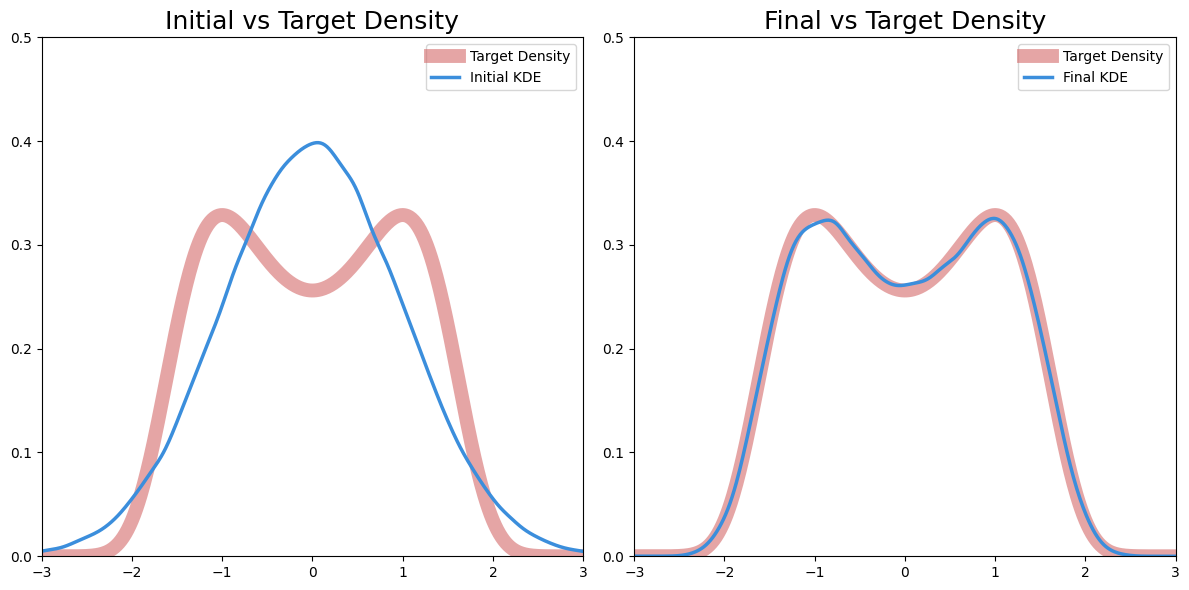

In [25]:
# compute KDEs
kde_initial = gaussian_kde(initial_particles)
kde_final = gaussian_kde(particles)

kde_initial_vals = kde_initial(x)
kde_final_vals = kde_final(x)

# plot
plt.figure(figsize=(12, 6))

# Initial vs Target
plt.subplot(1, 2, 1)
plt.plot(x, target_density, label='Target Density', lw=10, color='#D46A6A', alpha=0.6)
# plt.plot(bin_centers, initial_density, label='Initial Histogram', lw=2.5, color='#3B8EDC')
plt.plot(x, kde_initial_vals, label='Initial KDE', lw=2.5, color='#3B8EDC')
plt.title('Initial vs Target Density', fontsize=18)
plt.legend()
plt.xlim(-3, 3)
plt.ylim(0, 0.5)

# Final vs Target
plt.subplot(1, 2, 2)
plt.plot(x, target_density, label='Target Density', lw=10, color='#D46A6A', alpha=0.6)
# plt.plot(bin_centers, final_density, label='Final Histogram', lw=2.5, color='#3B8EDC')
plt.plot(x, kde_final_vals, label='Final KDE', lw=2.5, color='#3B8EDC')
plt.title('Final vs Target Density', fontsize=18)
plt.legend()
plt.xlim(-3, 3)
plt.ylim(0, 0.5)

plt.tight_layout()
plt.show()
